In [1]:
# Essas duas linhas recarregam o arquivo do módulo "funcoes_modelo_de_limiares.py" #
import funcoes as lim
import importlib
importlib.reload(lim)

###########################################################################################################################################

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from IPython.display import clear_output

Teste da função "simula_greve_estocastico" 

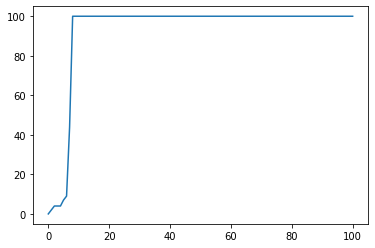

In [93]:
N = 100
media = 25
desvio_padrao = 2

agentes = lim.cria_agentes(N,media,desvio_padrao)

passos_temporais = 100

(progressao, tamanho_final) = lim.simula_greve_estocastico(agentes, passos_temporais)

plt.figure()
plt.plot(progressao)
plt.ylim(-5,105)
plt.show()

Teste da função "simula_greve_estocastico_2" 

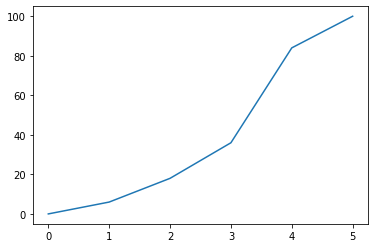

In [76]:
N = 100
media = 25
desvio_padrao = 12

agentes = lim.cria_agentes(N,media,desvio_padrao)

passos_temporais = 100

(progressao, tamanho_final) = lim.simula_greve_estocastico_2(agentes, passos_temporais)

plt.figure()
plt.plot(progressao)
plt.ylim(-5,105)
plt.show()

Tentativas de fazer o códido rodar através de processamento paralelo

In [398]:
"""
def teste(tupla):
    
    simulacoes = tupla[0]
    desvio_padrao = tupla[1]
    passos = tupla[2]
    N = 100
    media = 25
    media_tamanhos = 0
    #print(simulacoes,desvio_padrao,passos)
    global mapa
    
    for j in range(int(simulacoes)):
        
        agentes = lim.cria_agentes(N,media,desvio_padrao)
        tamanho_final = lim.simula_greve_estocastico(agentes, int(passos))[1]
        media_tamanhos += tamanho_final
    
    media_tamanhos = media_tamanhos/simulacoes
    return media_tamanhos
    #mapa[passos-1][desvio_padrao] = media_tamanhos
"""

In [ ]:
"""
import concurrent.futures
import itertools
import time

if __name__ == '__main__':
    sigma_max = 40
    t_max = 10
    mapa = np.zeros((t_max,sigma_max))
    simulacoes = 10


    agentes = lim.cria_agentes(N,media,desvio_padrao)
    tamanho_final = lim.simula_greve_estocastico(agentes, passos)[1]

    desvios_padroes = np.array([])
    aux_desvios_padroes = np.arange(0,sigma_max)
    for i in range(sigma_max):
        for j in range(t_max):
            desvios_padroes = np.append(desvios_padroes, aux_desvios_padroes[i])

    passos_temporais = np.array([])
    aux_passos_temporais = np.arange(1,t_max+1)
    for i in range(sigma_max):
        passos_temporais = np.append(passos_temporais, aux_passos_temporais)

    aux = np.arange(0,sigma_max*t_max)
    array_simulacoes = np.full_like(aux,simulacoes)

    tuplas = np.zeros((sigma_max*t_max,3))
    for i in range(sigma_max*t_max):
        tuplas[i] = tuple([int(array_simulacoes[i]),int(desvios_padroes[i]),int(passos_temporais[i])])

    #print(tuplas)

    #print((desvios_padroes),(passos_temporais),(array_simulacoes))

    t = time.perf_counter()
    with concurrent.futures.ThreadPoolExecutor() as executor:
        mapa = list(executor.map(teste, tuplas))

    t_2 = time.perf_counter()
    #print(mapa)
    print(t_2 - t)


    #print(array_simulacoes)
    #print(desvios_padroes)
    #print(passos_temporais)
    #print(len(array_simulacoes), len(desvios_padroes), len(passos_temporais))

    t = time.perf_counter()
    mapa = list(map(teste, tuplas))
    t_2 = time.perf_counter()
    print("nabla")
    print(mapa)
    print(t_2 - t)
"""

Visualização do mapa de calor através de gráfico 3D

In [ ]:
X, Y = np.meshgrid(desvios_padroes, passos_temporais)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, mapa, rstride=1, cstride=1, cmap='viridis', edgecolor='none',antialiased=True)
plt.show()

Mapa de calor da função "simula_greve_estocastico", com o desvio padrão da distruibuição no eixo x e o número de passos temporais no eixo y

In [ ]:
N = 100
media = 25
desvios_padroes = np.arange(0,100)  # desvios padrões da distribuição normal (de 0 até 99 de 1 em 1)
simulacoes = 100                    # número de simulações por valor de desvio padrão
medias = np.array([])
passos_temporais = np.arange(1,26)

mapa = np.zeros((25,100))

for k in passos_temporais:
    clear_output(wait=True)
    print(str("%.2f" % ((k-1)/25*100)+"%"), end="\n")
    
    for i in desvios_padroes:
        media_tamanhos = 0

        for j in range(simulacoes):
            agentes = lim.cria_agentes(N,media,i)
            tamanho_final = lim.simula_greve_estocastico(agentes, k)[1]
            media_tamanhos += tamanho_final

        media_tamanhos = media_tamanhos/simulacoes
        medias = np.append(medias, media_tamanhos)
        mapa[k-1][i] = media_tamanhos

plt.figure()
plt.imshow(mapa, origin="lower",cmap="jet")
#plt.savefig("Média do tamanho da greve - y = passos temporais e x = desvio padrao")
plt.show()

Mapa de calor da função "simula_greve_estocastico", com a média da distruibuição no eixo x e o desvio padrão no eixo y

99.00%


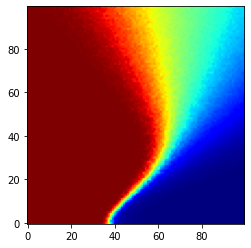

In [279]:
N = 100
medias_amostra = np.arange(0,100)
desvios_padroes = np.arange(0,100) # desvios padrões da distribuição normal (de 0 até 99 de 1 em 1)
simulacoes = 100                     # número de simulações por valor de desvio padrão
passos_temporais = 100

mapa = np.zeros((100,100))

for k in medias_amostra:
    clear_output(wait=True)
    print(str("%.2f" % (k)+"%"), end="\n")
    
    for i in desvios_padroes:
        media_tamanhos = 0

        for j in range(simulacoes):
            agentes = lim.cria_agentes(N,k,i)
            tamanho_final = lim.simula_greve_estocastico(agentes, passos_temporais)[1]
            media_tamanhos += tamanho_final

        media_tamanhos = media_tamanhos/simulacoes
        mapa[i][k] = media_tamanhos

plt.figure()
plt.imshow(mapa, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Estocástico")
plt.show()

Mapa de calor da função "simula_greve_estocastico_2", com a média da distruibuição no eixo x e o desvio padrão no eixo y

99.00%


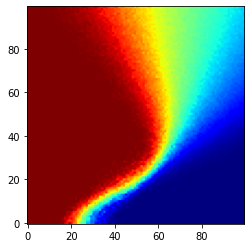

In [280]:
N = 100
medias_amostra = np.arange(0,100)
desvios_padroes = np.arange(0,100) # desvios padrões da distribuição normal (de 0 até 99 de 1 em 1)
simulacoes = 100                    # número de simulações por valor de desvio padrão
passos_temporais = 100

mapa = np.zeros((100,100))

for k in medias_amostra:
    clear_output(wait=True)
    print(str("%.2f" % (k)+"%"), end="\n")
    
    for i in desvios_padroes:
        media_tamanhos = 0

        for j in range(simulacoes):
            agentes = lim.cria_agentes(N,k,i)
            tamanho_final = lim.simula_greve_estocastico_2(agentes, passos_temporais)[1]
            media_tamanhos += tamanho_final

        media_tamanhos = media_tamanhos/simulacoes
        mapa[i][k] = media_tamanhos

plt.figure()
plt.imshow(mapa, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Estocástico_2_100simulacoes")
plt.show()

Recarregar a biblioteca de funções

In [ ]:
importlib.reload(lim)

Distribuição de probabilidades de um agente entrar e de sair de uma greve. Onde P(entrar) = 1 - P(sair)

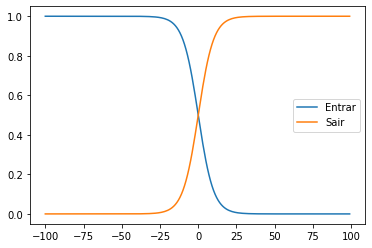

In [130]:
x = np.arange(-100,100)
m = 0.2

plt.figure()
plt.plot(x,1 / (1 + np.exp( m * x ) ),label = "Entrar")
plt.plot(x,1 / (1 + np.exp( -m * x ) ),label = "Sair")
#plt.plot(x, 1 - 1 / (1 + np.exp( -m * x ) ),label = "1 - P(Sair) = P(Entrar)")
plt.legend()
plt.show()

Teste da função "simula_greve_estocastico_saida" 

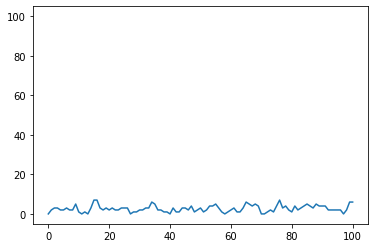

In [119]:
N = 100
media = 30
desvio_padrao = 12

agentes = lim.cria_agentes(N,media,desvio_padrao)

passos_temporais = 100

(progressao, tamanho_final) = lim.simula_greve_estocastico_saida(agentes, passos_temporais)

plt.figure()
plt.plot(progressao)
plt.ylim(-5,105)
plt.show()

Mapa de calor da função "simula_greve_estocastico_saida", com a média da distruibuição no eixo x e o desvio padrão no eixo y

99.00%


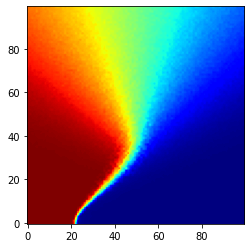

In [2]:
N = 100
media_max = 100
desvio_max = 100
medias_amostra = np.arange(0,media_max)
desvios_padroes = np.arange(0,desvio_max) # desvios padrões da distribuição normal (de 0 até 99 de 1 em 1)
simulacoes = 100                           # número de simulações por valor de desvio padrão
passos_temporais = 100

mapa = np.zeros((media_max,desvio_max))

for k in medias_amostra:
    clear_output(wait=True)
    print(str("%.2f" % (k/media_max * 100)+"%"), end="\n")
    
    for i in desvios_padroes:
        media_tamanhos = 0

        for j in range(simulacoes):
            agentes = lim.cria_agentes(N,k,i)
            tamanho_final = lim.simula_greve_estocastico_saida(agentes, passos_temporais)[1]
            media_tamanhos += tamanho_final

        media_tamanhos = media_tamanhos/simulacoes
        mapa[i][k] = media_tamanhos

plt.figure()
plt.imshow(mapa, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Estocástico_2_100simulacoes")
plt.show()

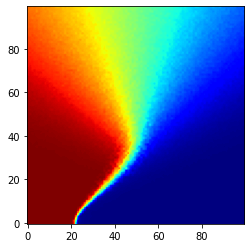

In [3]:
plt.figure()
plt.imshow(mapa, origin="lower",cmap="jet")
plt.savefig("Média e Desvio Padrão - Estocástico_saida")
plt.show()